# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [10]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
# Criando faixas de latitude
faixas_latitude = pd.cut(sinasc_raw['munResLat'], bins=[-np.inf, -10.5, np.inf], labels=['Abaixo de -10.5', 'Acima de -10.5'])

# Agrupando por essas faixas e calculando as estatísticas
resultado_latitude = sinasc_raw.groupby(faixas_latitude)[['IDADEMAE', 'IDADEPAI']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
resultado_latitude


<ipython-input-11-491bb5cb8b98>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado_latitude = sinasc_raw.groupby(faixas_latitude)[['IDADEMAE', 'IDADEPAI']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


IDADEMAE                                                 \
                     sum       mean min max median       std        var   
munResLat                                                                 
Abaixo de -10.5   340143  26.178943  12  53   26.0  6.320385  39.947272   
Acima de -10.5    365094  26.014964  11  52   25.0  6.447663  41.572355   

                 IDADEPAI                                                     
                      sum       mean   min   max median       std        var  
munResLat                                                                     
Abaixo de -10.5  198460.0  30.903145  15.0  86.0   30.0  7.707002  59.397875  
Acima de -10.5    38038.0  32.126689  16.0  73.0   31.0  8.034214  64.548602

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [12]:
# Criando faixas de área
faixas_area = pd.cut(sinasc_raw['munResArea'], bins=[-np.inf, 3000, np.inf], labels=['Abaixo de 3000', 'Acima de 3000'])

# Agrupando por essas faixas e calculando as estatísticas
resultado_area = sinasc_raw.groupby(faixas_area)[['IDADEMAE', 'IDADEPAI']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
resultado_area


<ipython-input-12-bd45a80c7746>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado_area = sinasc_raw.groupby(faixas_area)[['IDADEMAE', 'IDADEPAI']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


IDADEMAE                                                 \
                    sum       mean min max median       std        var   
munResArea                                                               
Abaixo de 3000   137389  26.324775  11  53   26.0  6.305535  39.759775   
Acima de 3000    567848  26.038518  12  53   25.0  6.405497  41.030387   

                IDADEPAI                                                     
                     sum       mean   min   max median       std        var  
munResArea                                                                   
Abaixo de 3000   78074.0  31.092792  16.0  69.0   30.0  7.675474  58.912900  
Acima de 3000   158424.0  31.094014  15.0  86.0   30.0  7.818364  61.126809

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [13]:
# Criando faixas de altitude
faixas_altitude = pd.cut(sinasc_raw['munResAlt'], bins=[-np.inf, 200, 400, 600, np.inf], labels=['Até 200m', '200-400m', '400-600m', 'Acima de 600m'])

# Agrupando por essas faixas e calculando as estatísticas
resultado_altitude = sinasc_raw.groupby(faixas_altitude)[['IDADEMAE', 'IDADEPAI']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
resultado_altitude


<ipython-input-13-9ee339378f38>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado_altitude = sinasc_raw.groupby(faixas_altitude)[['IDADEMAE', 'IDADEPAI']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


IDADEMAE                                                     \
                   sum       mean   min   max median       std        var   
munResAlt                                                                   
Até 200m        542101  26.028761  11.0  52.0   25.0  6.410498  41.094486   
200-400m        115199  26.205414  13.0  53.0   26.0  6.279524  39.432426   
400-600m         47937  26.572616  14.0  47.0   26.0  6.357159  40.413470   
Acima de 600m        0        NaN   NaN   NaN    NaN       NaN        NaN   

               IDADEPAI                                                     
                    sum       mean   min   max median       std        var  
munResAlt                                                                   
Até 200m       145627.0  31.150160  15.0  73.0   30.0  7.864255  61.846510  
200-400m        84000.0  30.769231  16.0  86.0   30.0  7.629392  58.207627  
400-600m         6871.0  34.184080  18.0  60.0   34.0  6.749144  45.550945  
Acima de 600m       0.0        NaN   NaN   NaN    NaN       NaN        NaN

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [19]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

<Figure size 1200x600 with 0 Axes>

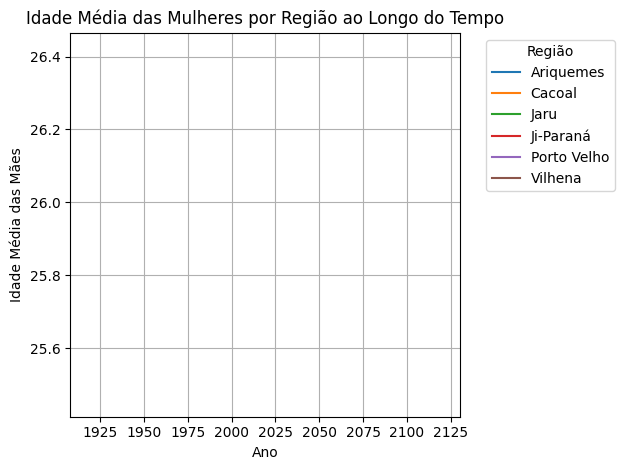

In [18]:
# Criando coluna de região
sinasc_raw['Regiao'] = sinasc_raw['munResNome'].map(imediatas)

# Convertendo a data para o formato correto
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

# Agrupando por ano, região e calculando a idade média das mulheres
sinasc_raw['Ano'] = sinasc_raw['DTNASC'].dt.year
idade_media = sinasc_raw.groupby(['Ano', 'Regiao'])['IDADEMAE'].mean().unstack()

# Plotando o gráfico
plt.figure(figsize=(12, 6))
idade_media.plot(kind='line')
plt.title('Idade Média das Mulheres por Região ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Idade Média das Mães')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [22]:
import pandas as pd

# Lista simplificada dos dados extraídos da Wikipédia
dados_idh = {
    "municipio": [
        "Porto Velho", "Vilhena", "Cacoal", "Ji-Paraná", "Pimenta Bueno", "Ariquemes", "Rolim de Moura",
        "Cerejeiras", "Jaru", "Vale do Anari"
    ],
    "idh": [0.736, 0.731, 0.718, 0.714, 0.710, 0.702, 0.700, 0.692, 0.689, 0.584]
}

df_idh = pd.DataFrame(dados_idh)


In [23]:
def classificar_idh(valor):
    if valor >= 0.800:
        return "Muito alto"
    elif valor >= 0.700:
        return "Alto"
    elif valor >= 0.600:
        return "Médio"
    elif valor >= 0.500:
        return "Baixo"
    else:
        return "Muito baixo"

df_idh["faixa_idh"] = df_idh["idh"].map(classificar_idh)


In [24]:
agrupamento = df_idh.groupby("faixa_idh").count()["municipio"]
print(agrupamento)


faixa_idh
Alto     7
Baixo    1
Médio    2
Name: municipio, dtype: int64


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [25]:
import pandas as pd

# Dados extraídos da Wikipédia (municípios de Rondônia por IFDM - 2013)
dados_ifdm = [
    ("Ariquemes", 0.7746),
    ("Vilhena", 0.7465),
    ("Pimenta Bueno", 0.7383),
    ("Porto Velho", 0.7257),
    ("Ji-Paraná", 0.7117),
    ("Cacoal", 0.7111),
    ("Santa Luzia d'Oeste", 0.6850),
    ("Rolim de Moura", 0.6785),
    ("Chupinguaia", 0.6766),
    ("São Miguel do Guaporé", 0.6699),
    ("Pimenteiras do Oeste", 0.6501),
    ("Teixeirópolis", 0.6500),
    ("Colorado do Oeste", 0.6473),
    ("Jaru", 0.6450),
    ("Rio Crespo", 0.6430),
    ("Primavera de Rondônia", 0.6384),
    ("Alta Floresta d'Oeste", 0.6337),
    ("Ouro Preto do Oeste", 0.6261),
    ("São Francisco do Guaporé", 0.6214),
    ("Candeias do Jamari", 0.6199),
    ("Buritis", None),
    ("São Felipe d'Oeste", 0.6153),
    ("Presidente Médici", 0.6140),
    ("Cerejeiras", 0.6137),
    ("Monte Negro", 0.6016),
    ("Urupá", 0.6006),
    ("Espigão d'Oeste", 0.5973),
    ("Seringueiras", 0.5922),
    ("Alvorada d'Oeste", 0.5919),
    ("Itapuã do Oeste", 0.5903),
    ("Cabixi", 0.5887),
    ("Novo Horizonte do Oeste", 0.5858),
    ("Nova Brasilândia d'Oeste", 0.5857),
    ("Vale do Paraíso", 0.5818),
    ("Corumbiara", 0.5759),
    ("Alto Paraíso", 0.5735),
    ("Cacaulândia", 0.5721),
    ("Vale do Anari", 0.5710),
    ("Ministro Andreazza", 0.5657),
    ("Costa Marques", 0.5626),
    ("Nova União", 0.5571),
    ("Guajará-Mirim", 0.5541),
    ("Mirante da Serra", 0.5519),
    ("Parecis", 0.5502),
    ("Castanheiras", 0.5430),
    ("Theobroma", 0.5405),
    ("Machadinho d'Oeste", 0.5322),
    ("Campo Novo de Rondônia", 0.5272),
    ("Nova Mamoré", 0.5084),
    ("Cujubim", 0.5055),
    ("Alto Alegre dos Parecis", 0.5046),
    ("Governador Jorge Teixeira", 0.4562)
]

# Criação do DataFrame
df_ifdm = pd.DataFrame(dados_ifdm, columns=["Município", "IFDM_2013"])
df_ifdm.head()


,Município,IFDM_2013
0,Ariquemes,0.7746
1,Vilhena,0.7465
2,Pimenta Bueno,0.7383
3,Porto Velho,0.7257
4,Ji-Paraná,0.7117


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [27]:
import pandas as pd

# Criar a tabela dos municípios com o PIB conforme o site fornecido
data = {
    "Município": ["Porto Velho", "Ji-Paraná", "Vilhena", "Ariquemes", "Cacoal",
                  "Jaru", "Rolim de Moura", "Pimenta Bueno", "Guajará-Mirim",
                  "Ouro Preto do Oeste", "Buritis", "Machadinho do Oeste",
                  "Espigão d'Oeste", "São Miguel do Guaporé", "Candeias do Jamari",
                  "Nova Mamoré", "Cerejeiras", "Alta Floresta do Oeste",
                  "Presidente Médici", "Cujubim", "Nova Brasilândia do Oeste",
                  "Alto Paraíso", "São Francisco do Guaporé", "Colorado do Oeste",
                  "Monte Negro", "Alto Alegre dos Parecis", "Campo Novo de Rondônia",
                  "Alvorada do Oeste", "Chupinguaia", "Corumbiara", "Ministro Andreazza",
                  "Urupá", "Costa Marques", "Seringueiras", "Mirante da Serra",
                  "Governador Jorge Teixeira", "Theobroma", "Santa Luzia do Oeste",
                  "Novo Horizonte do Oeste", "Itapuã do Oeste", "Vale do Paraíso",
                  "Cacaulândia", "Cabixi", "Vale do Anari", "Nova União",
                  "Parecis", "Rio Crespo", "Pimenteiras do Oeste", "Teixeirópolis",
                  "São Felipe do Oeste", "Castanheiras", "Primavera de Rondônia"],
    "PIB_2019": [17912070, 3783972, 2831175, 2579830, 2261644,
                 1500890, 1283434, 1164877, 893000, 834000, 726000,
                 633000, 625000, 616000, 548000, 529000, 507000,
                 496000, 428000, 385000, 360000, 358000, 353000,
                 335000, 219152, 213410, 208821, 204098, 190331,
                 188218, 174633, 172143, 171878, 169429, 163955,
                 148027, 140601, 135934, 129399, 129351, 116742,
                 116635, 113031, 105208, 92346, 80759, 76854,
                 76756, 72089, 72084, 59779, 52908]
}

# Criar o DataFrame
df = pd.DataFrame(data)

# Definir as faixas de PIB
bins = [0, 100000000, 200000000, 300000000, 500000000, 1000000000, float('inf')]
labels = ["Até 100 Milhões", "Acima de 100 Milhões", "Acima de 200 Milhões", "Acima de 300 Milhões",
          "Acima de 500 Milhões", "Acima de 1 Bilhão"]

# Criar a coluna de faixas
df['Faixa PIB'] = pd.cut(df['PIB_2019'], bins=bins, labels=labels, right=False)

# Agrupar por faixas e exibir o resultado
grouped = df.groupby('Faixa PIB').size().reset_index(name='Contagem')

# Exibir o resultado
print(grouped)


              Faixa PIB  Contagem
0       Até 100 Milhões        52
1  Acima de 100 Milhões         0
2  Acima de 200 Milhões         0
3  Acima de 300 Milhões         0
4  Acima de 500 Milhões         0
5     Acima de 1 Bilhão         0


<ipython-input-27-32315525b6bd>:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Faixa PIB').size().reset_index(name='Contagem')


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

> Identifiquei que os municípios com o maior PIB em Rondônia, como Porto Velho, Ji-Paraná e Vilhena, também mostram os melhores índices de desenvolvimento social, avaliados pelo IFDM (Índice FIRJAN de Desenvolvimento Municipal), especialmente em educação e saúde. Isso indica que a economia mais robusta dessas cidades está positivamente correlacionada com o melhor acesso a serviços de qualidade, resultando em um maior bem-estar para suas populações